<a href="https://colab.research.google.com/github/simon-hpl/mask2former/blob/main/M2F_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_version = r'/content/drive/My Drive/AI Models/MaskFormer/26March_10'


In [ ]:
import torch
from transformers import MaskFormerForInstanceSegmentation, AutoImageProcessor
processor = AutoImageProcessor.from_pretrained(model_version)

model = MaskFormerForInstanceSegmentation.from_pretrained(
   model_version, ignore_mismatched_sizes=True
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)




/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)
Backbone maskformer-swin is not a supported model and may not be compatible with MaskFormer. Supported model types: resnet,swin


MaskFormerForInstanceSegmentation(
  (model): MaskFormerModel(
    (pixel_level_module): MaskFormerPixelLevelModule(
      (encoder): MaskFormerSwinBackbone(
        (model): MaskFormerSwinModel(
          (embeddings): MaskFormerSwinEmbeddings(
            (patch_embeddings): MaskFormerSwinPatchEmbeddings(
              (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
            )
            (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (encoder): MaskFormerSwinEncoder(
            (layers): ModuleList(
              (0): MaskFormerSwinStage(
                (blocks): ModuleList(
                  (0): MaskFormerSwinLayer(
                    (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
                    (attention): MaskFormerSwinAttention(
                      (self): MaskFormerSwinSelfAttention(
                        (query): Linear(in_featur

In [ ]:
import torch
from transformers import Mask2FormerForUniversalSegmentation, AutoImageProcessor
processor = AutoImageProcessor.from_pretrained(model_version)
model = Mask2FormerForUniversalSegmentation.from_pretrained(
    model_version, ignore_mismatched_sizes=True
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)
You are using a model of type maskformer to instantiate a model of type mask2former. This is not supported for all configurations of models and can yield errors.
Backbone maskformer-swin is not a supported model and may not be compatible with Mask2Former. Supported model types: swin
Some weights of Mask2FormerForUniversalSegmentation were not initialized from the model checkpoint at /content/drive/My Drive/AI Models/MaskFormer/26March_10 and are newly initialized: ['model.pixel_level_module.decoder.adapter_1.0.weight', 'model.pixel_level_module.decoder.adapter_1.1.bias', 'model.pixel_level_module.decoder.adapter_1.1.weight', 'model.pixel_level_module.decoder.encoder.layers.0.fc1.bias', 'model.pixel_level_module.decoder.encoder.layers.0.fc1.weight', 'model.pi

Mask2FormerForUniversalSegmentation(
  (model): Mask2FormerModel(
    (pixel_level_module): Mask2FormerPixelLevelModule(
      (encoder): MaskFormerSwinBackbone(
        (model): MaskFormerSwinModel(
          (embeddings): MaskFormerSwinEmbeddings(
            (patch_embeddings): MaskFormerSwinPatchEmbeddings(
              (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
            )
            (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (encoder): MaskFormerSwinEncoder(
            (layers): ModuleList(
              (0): MaskFormerSwinStage(
                (blocks): ModuleList(
                  (0): MaskFormerSwinLayer(
                    (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
                    (attention): MaskFormerSwinAttention(
                      (self): MaskFormerSwinSelfAttention(
                        (query): Linear(in_fe

In [ ]:
def get_prediction(image):
  inputs = processor(images=[image], return_tensors="pt")
  inputs = inputs.to(device)
  with torch.no_grad():
    outputs = model(**inputs)
  predicted_semantic_map = processor.post_process_panoptic_segmentation(
        outputs, target_sizes=[image.size[::-1]]
    )[0]
  return predicted_semantic_map

In [ ]:
predicted_semantic_map

{'segmentation': tensor([[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32),
 'segments_info': [{'id': 1,
   'label_id': 4,
   'was_fused': False,
   'score': 0.979593},
  {'id': 2, 'label_id': 1, 'was_fused': False, 'score': 0.89948},
  {'id': 3, 'label_id': 0, 'was_fused': False, 'score': 0.998777}]}

`label_ids_to_fuse` unset. No instance will be fused.


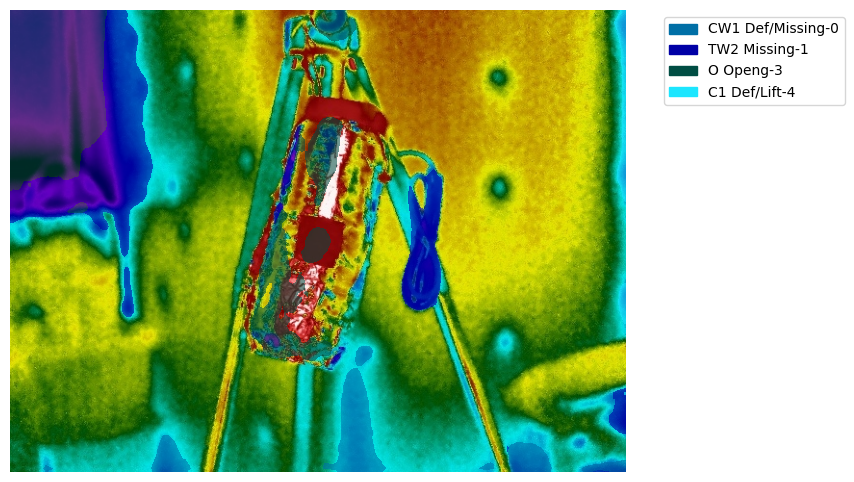

`label_ids_to_fuse` unset. No instance will be fused.


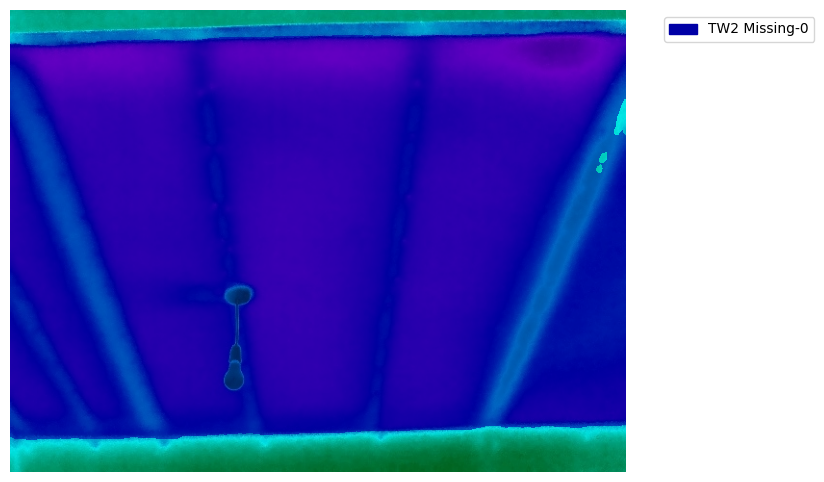

`label_ids_to_fuse` unset. No instance will be fused.


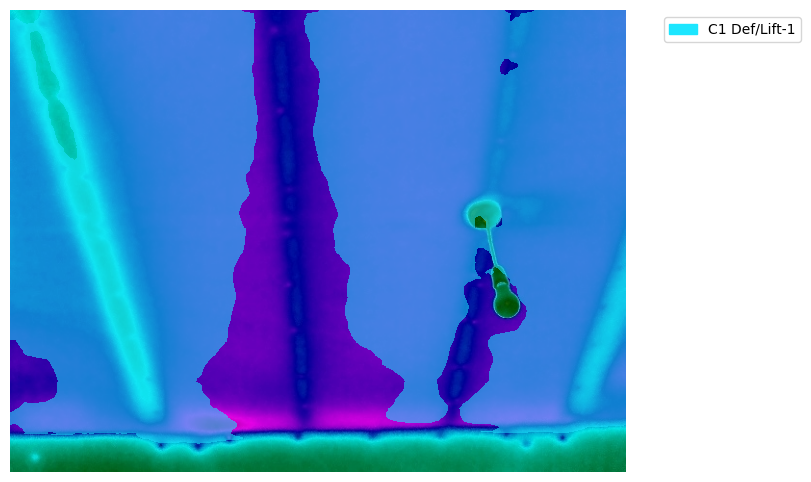

`label_ids_to_fuse` unset. No instance will be fused.


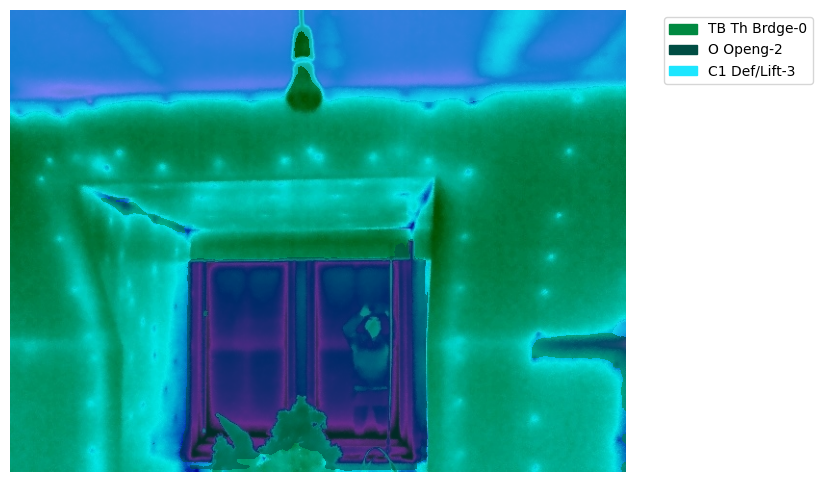

`label_ids_to_fuse` unset. No instance will be fused.


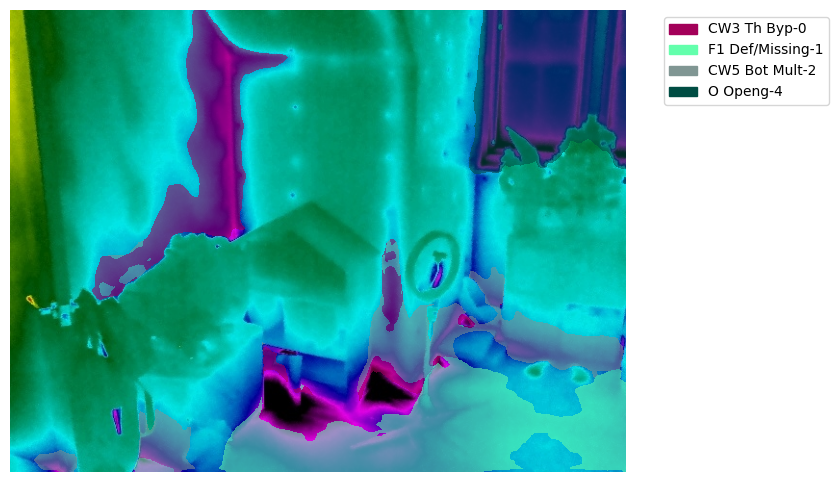

`label_ids_to_fuse` unset. No instance will be fused.


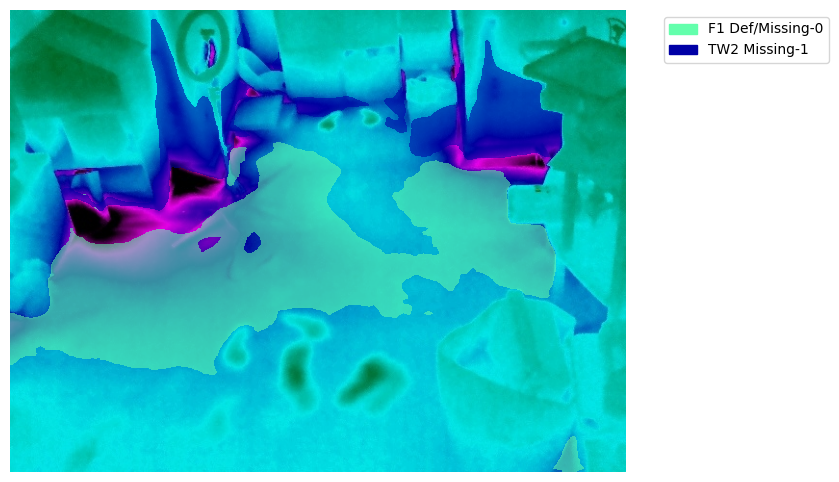

`label_ids_to_fuse` unset. No instance will be fused.


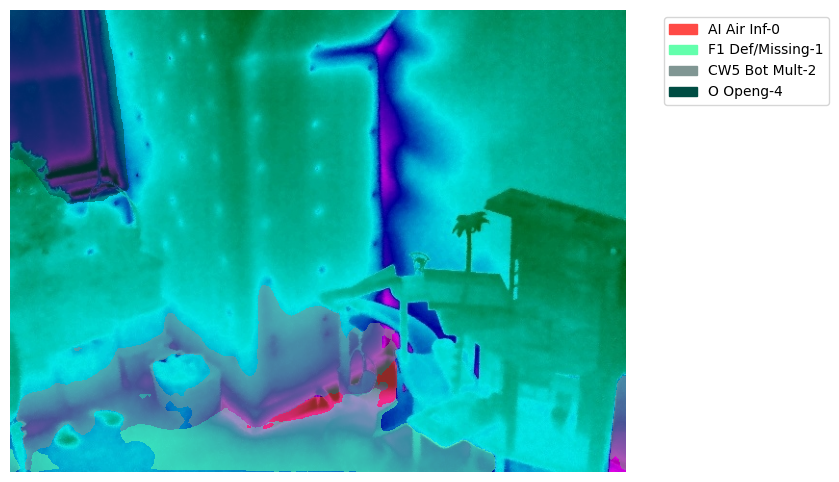

`label_ids_to_fuse` unset. No instance will be fused.


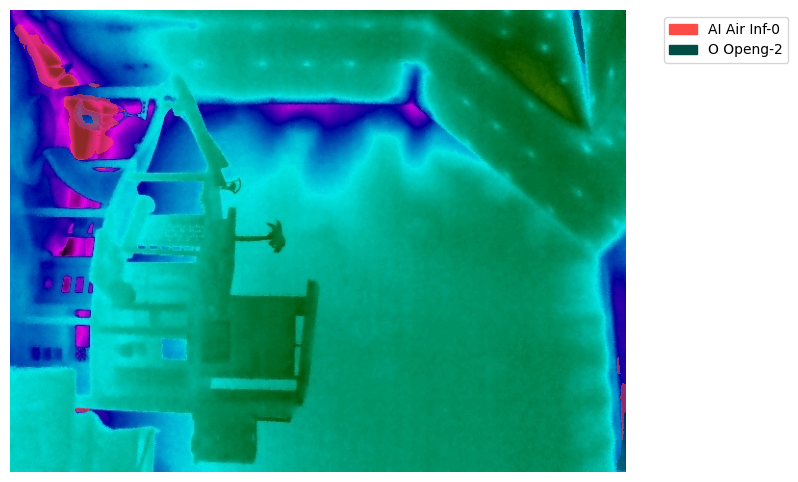

`label_ids_to_fuse` unset. No instance will be fused.


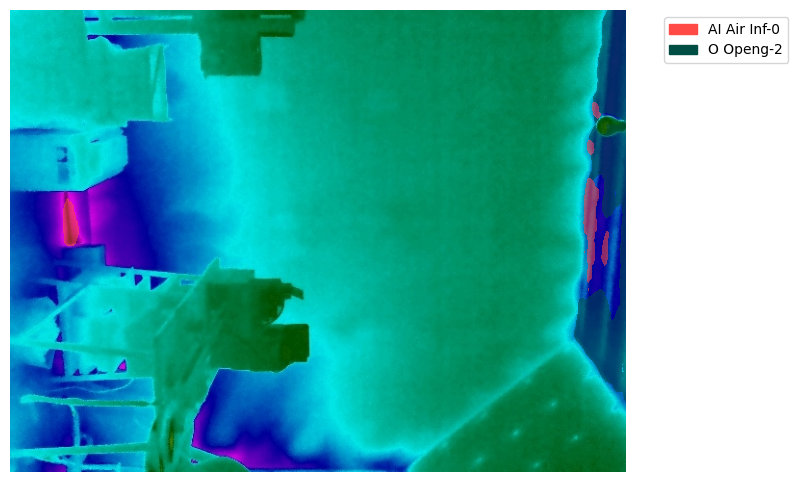

`label_ids_to_fuse` unset. No instance will be fused.


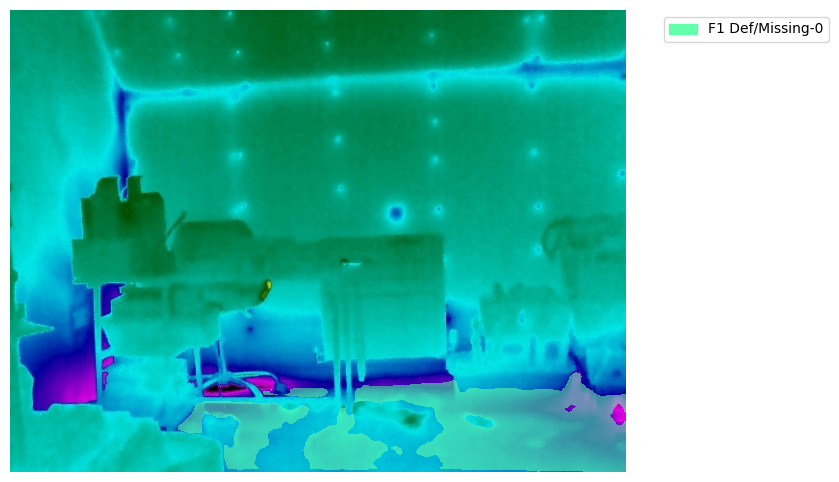

`label_ids_to_fuse` unset. No instance will be fused.


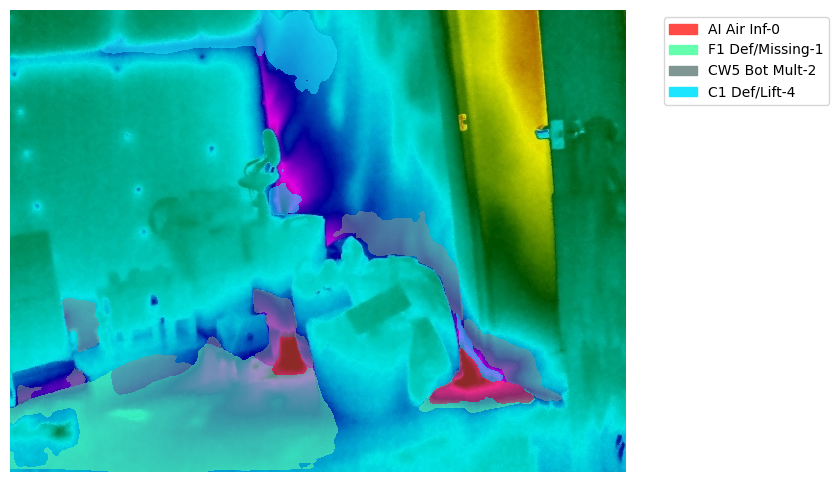

`label_ids_to_fuse` unset. No instance will be fused.


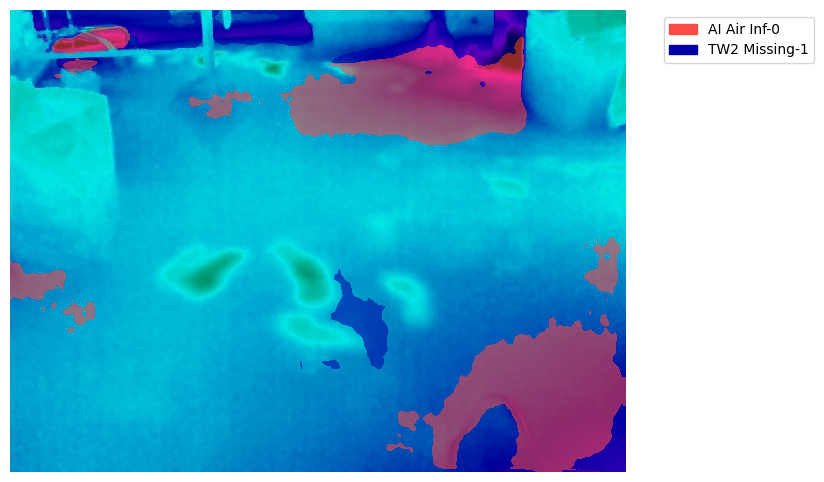

`label_ids_to_fuse` unset. No instance will be fused.


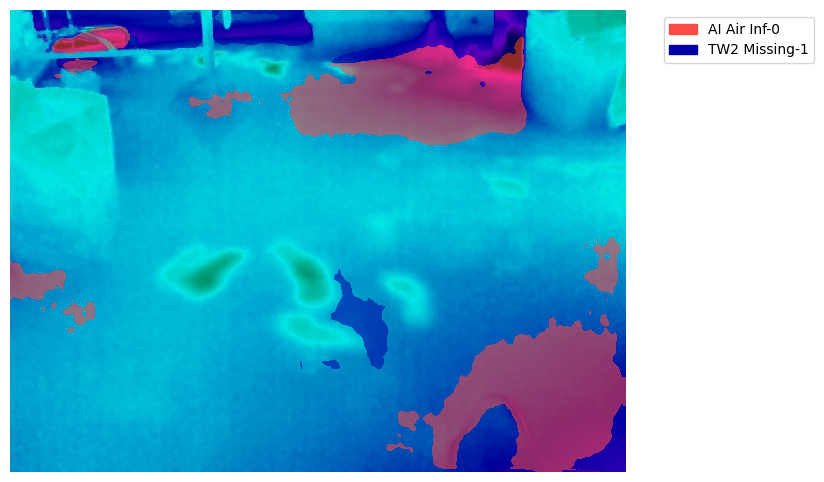

`label_ids_to_fuse` unset. No instance will be fused.


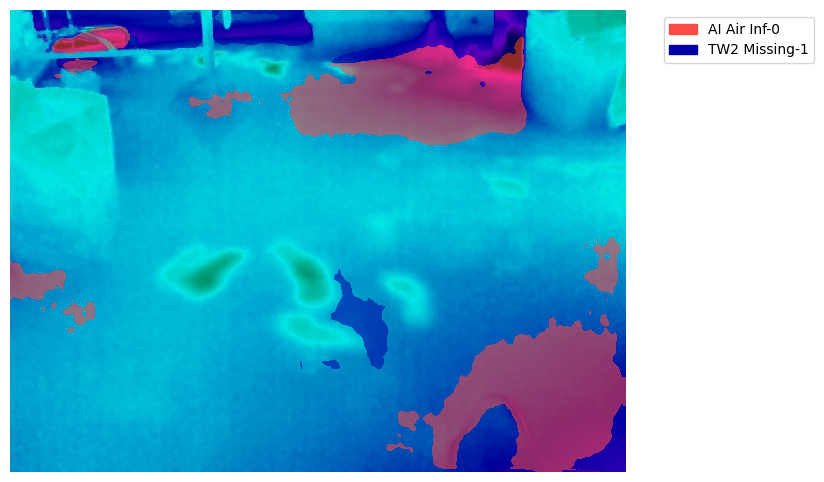

`label_ids_to_fuse` unset. No instance will be fused.


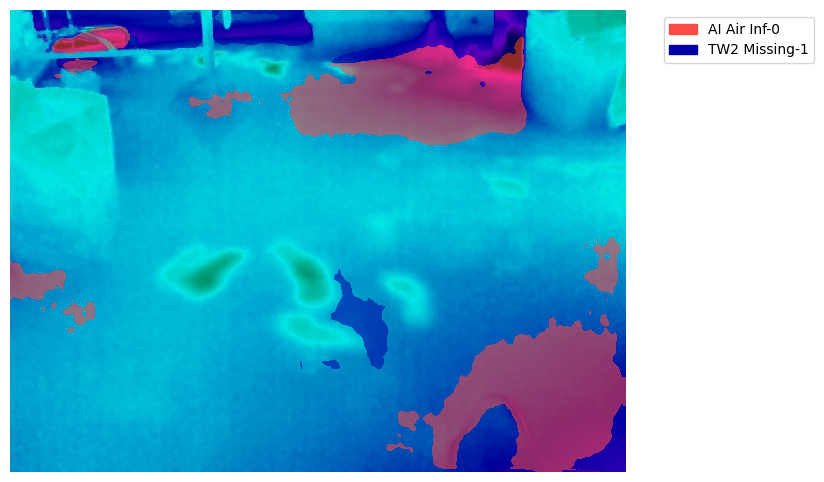

`label_ids_to_fuse` unset. No instance will be fused.


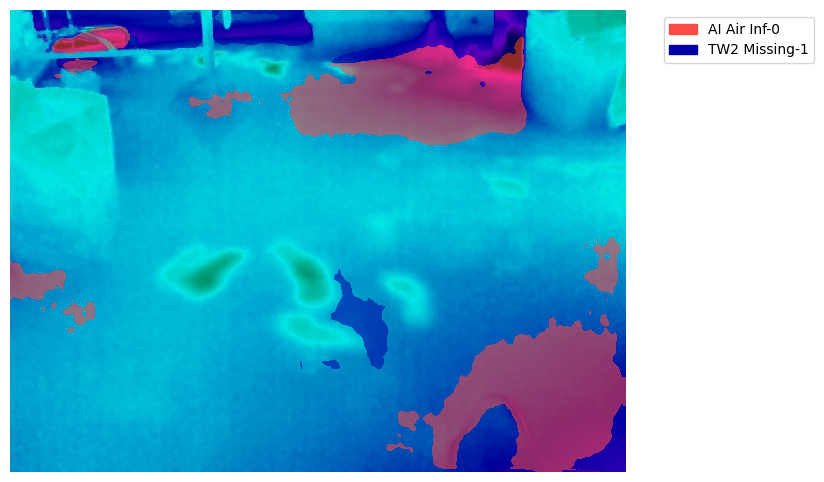

`label_ids_to_fuse` unset. No instance will be fused.


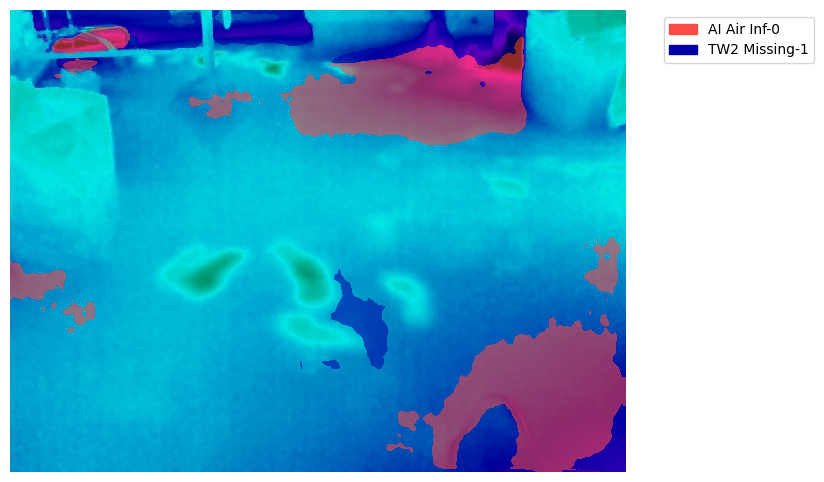

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgb

import numpy as np
import os

id2color = {0: '#000000',
 1: '#1CE6FF',
 2: '#FF34FF',
 3: '#FF4A46',
 4: '#008941',
 5: '#006FA6',
 6: '#A30059',
 7: '#5A0007',
 8: '#809693',
 9: '#FFDBE5',
 10: '#7A4900',
 11: '#0000A6',
 12: '#63FFAC',
 13: '#B79762',
 14: '#004D43',
 15: '#8FB0FF',
 16: '#997D87'}

#go through test folder and show predictions
test_folder = r'/content/drive/My Drive/Data/Labelbox_Data/Fiesta/test/images'#bbox
test_folder = r'/content/drive/My Drive/Data/Bellway 44HA image set 20241203/cleaned as report'#bbox

all_files = os.listdir(test_folder)
#files_to_process = all_files[:5]
files_to_process = all_files

for filename in files_to_process:
  if filename.endswith('.jpg'):
    image = Image.open(os.path.join(test_folder, filename))
  predicted_semantic_map = get_prediction(image)
  num_instances = len(predicted_semantic_map["segments_info"])
  overlay = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 4))


  for i, info in enumerate(predicted_semantic_map["segments_info"]):
        #mask = predicted_semantic_map["segmentation"] == info["id"]
        mask = (predicted_semantic_map["segmentation"] == info["id"]).cpu().numpy()

        label_id = info['label_id']
        hex_color = id2color[label_id]

        color = to_rgb(hex_color)

        if label_id != 0:  #if not background
            overlay[mask, :3] = color[:3]  # RGB channels
            overlay[mask, 3] = 0.8  # Alpha channel for transparency

  fig, ax = plt.subplots(figsize=(8, 6))
  ax.imshow(np.array(image))
  ax.imshow(overlay, interpolation="nearest", alpha=0.7)
  plt.axis("off")

  handles = [
            mpatches.Patch(
                color=id2color[info['label_id']],
                label=f"{model.config.id2label[info['label_id']]}-{i}"
            )
            for i, info in enumerate(predicted_semantic_map["segments_info"])
            if info['label_id'] != 0  # Exclude the background class
        ]
  plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc="upper left")

  plt.show()